In [1]:
import pandas as pd
import pyspark as spark
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import os.path
from os import listdir
from os.path import isfile, join
import scipy.io as sio
from scipy.signal import find_peaks 
from bioinfokit.analys import stat
import math
import shelve

In [2]:
%run -i cmcf_functions.ipynb

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sns.set(rc={'figure.figsize':(10,5)})
res = stat()
ordered = ["CM", "Condition Media", "CMCF", "DCM"]

## Day 12

In [5]:
max_array_d12 = {}
tau_array_d12 = {}
lax_time_array_d12 = {}
up_array_d12 = {}
time_at_max_array_d12  = {}

### CF

In [6]:
d12_val = "Condition Media" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'CF'),"D12"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
cfd12_datas = []

for i in range(len(onlyfiles)):
    cfd12 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    cfd12_datas.append(cfd12)

In [7]:
data_len = len(cfd12_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
bases = {}
for i in range(len(cfd12_datas)):
    x = cfd12_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .56, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [8]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d12[d12_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [9]:
#Relaxation Rate 
df_tau,tau_array_d12[d12_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d12[d12_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d12[d12_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d12[d12_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

<ipython-input-2-fa06b561dfcd>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f_dict = dict([ (k,pd.Series(v)) for k,v in e_dict.items() ])


In [10]:
# for i in range(len(cfd12_datas)):
   
#     x = cfd12_datas[i]["E2"]
    
#     num_counts = []
#     #determine baseline through trial and error with given part of cell experiences no contraction
#     val = .008
#     #loop through each image
#     for img in x.swapaxes(2,0).swapaxes(1,2) :
#         thresh_val = thresh(img,val)
#         num_counts.append(thresh_val)
#     df = pd.DataFrame(dict(x = np.arange(0,x.shape[2]), y = num_counts)) 
#     plt.figure()
#     g = sns.lineplot(data = df, y = "y", x= "x")
#     g.set_xticks(np.arange(0,275,10))
#     g.set_title(i)

### CM

In [11]:
d12_val = "CM" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'CM'),"D12"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
cmd12_datas = []

for i in range(len(onlyfiles)):
    cmd12 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    cmd12_datas.append(cmd12)

In [12]:
data_len = len(cmd12_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
for i in range(len(cmd12_datas)):
    x = cmd12_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .55, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [13]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d12[d12_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [14]:
#Relaxation Rate 
df_tau,tau_array_d12[d12_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d12[d12_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d12[d12_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d12[d12_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

<ipython-input-2-fa06b561dfcd>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f_dict = dict([ (k,pd.Series(v)) for k,v in e_dict.items() ])


### CMCF

In [15]:
d12_val = "CMCF" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'CMCF'),"D12"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
cmcfd12_datas = []

for i in range(len(onlyfiles)):
    cmcfd12 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    cmcfd12_datas.append(cmcfd12)

In [16]:
data_len = len(cmcfd12_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
for i in range(len(cmcfd12_datas)):
    x = cmcfd12_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .55, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [17]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d12[d12_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [18]:
#Relaxation Rate 
df_tau,tau_array_d12[d12_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d12[d12_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d12[d12_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d12[d12_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

<ipython-input-2-fa06b561dfcd>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f_dict = dict([ (k,pd.Series(v)) for k,v in e_dict.items() ])


### DCM

In [19]:
d12_val = "DCM" 
pathname = os.path.join(os.path.join(os.path.join('Full CMCF Data', 'DCM'),"D12"),"Strain_Data")

onlyfiles = [f for f in listdir(pathname) if isfile(join(pathname, f))]
dcmd12_datas = []

for i in range(len(onlyfiles)):
    dcmd12 = sio.loadmat(os.path.join(pathname, onlyfiles[i]))
    dcmd12_datas.append(dcmd12)

In [20]:
data_len = len(dcmd12_datas)
all_vals = {}
peaks_count = {}
peaks = {}
max_vals = {}
for i in range(len(dcmd12_datas)):
    x = dcmd12_datas[i]["E2"]
    num_counts = []
    #determine baseline through trial and error with given part of cell experiences no contraction
    val = .008
    #loop through each image
    for img in x.swapaxes(2,0).swapaxes(1,2) :
        thresh_val = thresh(img,val)
        num_counts.append(thresh_val)
    all_vals[i] = num_counts
    peaks[i], vals  = find_peaks(num_counts, prominence = .5, height = .5, width = 2)
    max_vals[i] = vals["peak_heights"]

In [21]:
max_dict = dict([ (k,pd.Series(v)) for k,v in max_vals.items() ])
max_df = pd.DataFrame(max_dict)
max_array_d12[d12_val] = np.concatenate(list(max_dict.values()))
peaks_count = {key: len(value) for key, value in peaks.items()}

In [22]:
#Relaxation Rate 
df_tau,tau_array_d12[d12_val] = funcToPlot(tau, all_vals, peaks_count, data_len, max_df)
#Relaxation Time
df_time_val, lax_time_array_d12[d12_val] = funcToPlot(timeToRest, all_vals, peaks_count, data_len, max_df)
#Contraction Rate
df_up_val, up_array_d12[d12_val] = funcToPlot(backTau, all_vals, peaks_count, data_len, max_df)
#Time at Max
df_time_max_val, time_at_max_array_d12[d12_val] = funcToPlot(atMax, all_vals, peaks_count, data_len, max_df)

<ipython-input-2-fa06b561dfcd>:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f_dict = dict([ (k,pd.Series(v)) for k,v in e_dict.items() ])


### Visuals

Text(0.5, 1.0, 'Highest Percentage of Cells Contracting in Each Strain on Day 12')

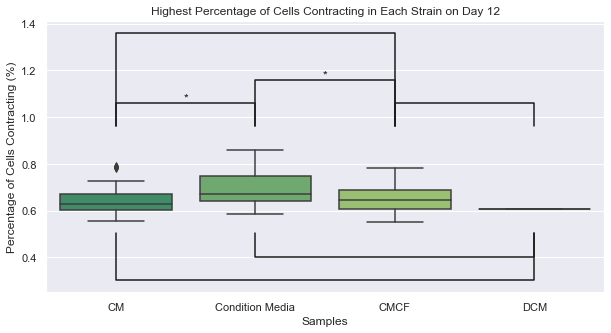

In [23]:
g = plot_box(max_array_d12,0)
g.set_title("Highest Percentage of Cells Contracting in Each Strain on Day 12")

Text(0.5, 1.0, 'Relaxation Rate of Cells in Each Strain on Day 12')

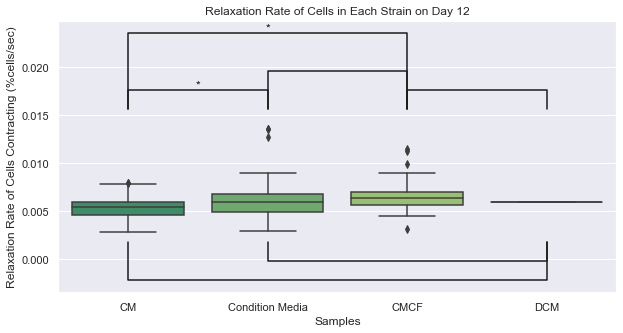

In [24]:
g = plot_box(tau_array_d12,1)
g.set_title("Relaxation Rate of Cells in Each Strain on Day 12")

Text(0.5, 1.0, 'Time of Cells Relaxing in Each Strain on Day 12')

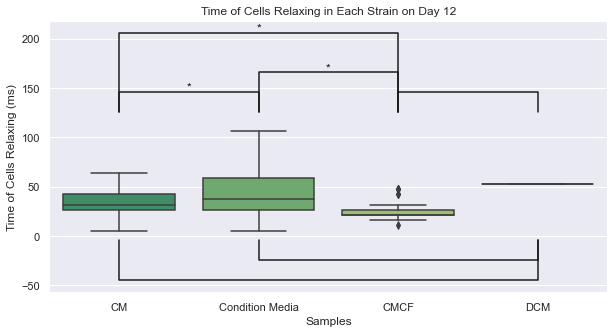

In [25]:
#lax array
g = plot_box(lax_time_array_d12,2)
g.set_title("Time of Cells Relaxing in Each Strain on Day 12")

Text(0.5, 1.0, 'Contraction Rate in Each Strain on Day 12')

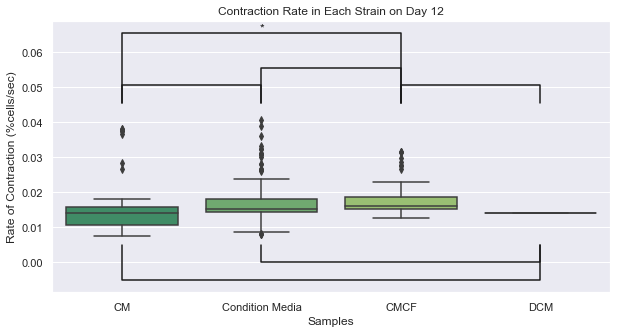

In [26]:
g = plot_box(up_array_d12,3)
g.set_title("Contraction Rate in Each Strain on Day 12")

In [27]:
%run -i cmcf_functions.ipynb

Text(0.5, 1.0, 'Time of Contraction in Each Strain on Day 12')

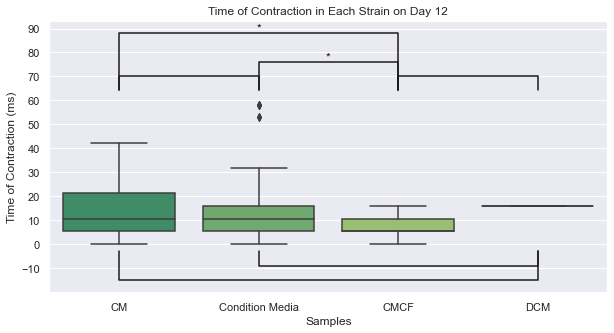

In [28]:
g = plot_box(time_at_max_array_d12,4)
g.set_yticks(np.arange(-10,100,10))
g.set_title("Time of Contraction in Each Strain on Day 12")

In [29]:
# file to be used
shelf = shelve.open("day12.shlf")

# serializing
shelf["max_array_d12"] = max_array_d12
shelf["lax_time_array_d12"] = lax_time_array_d12
shelf["tau_array_d12"] = tau_array_d12
shelf["up_array_d12"] = up_array_d12
shelf["time_at_max_array_d12"] = time_at_max_array_d12

shelf.close() # you must close the shelve file!!!

In [30]:
#Pad array to convert to excel

max_df = array_to_df(max_array_d12)
lax_df = array_to_df(lax_time_array_d12)
tau_df = array_to_df(tau_array_d12)
up_df = array_to_df(up_array_d12)
time_df = array_to_df(time_at_max_array_d12)
with pd.ExcelWriter('day12.xlsx') as writer:  
    max_df.to_excel(writer, sheet_name = "max")
    lax_df.to_excel(writer, sheet_name = "lax")
    tau_df.to_excel(writer, sheet_name = "tau")
    up_df.to_excel(writer, sheet_name = "up")
    time_df.to_excel(writer, sheet_name = "time")